# LINEAR MODEL MUST HAVE DATA--------Abalone Final

Linearity: assumes that the relationship between predictors and target variable is linear

No Noise: Eg:There is no outlier in the data

No Collinearity: if you have highly correlated predictors, it's most likely your model will overfit

Normal Distribution: more reliable predictors are made if the predictors and the target variable are normally distributed

Scale: its a distance-base algorithm,so predictors should be scaled-like with standard scaler


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy


import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("abalone.csv")

In [3]:
df.head(3)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [4]:
df.sample(3)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1485,F,0.590,0.46,0.145,0.9905,0.4530,0.2205,0.275,8
872,M,0.620,0.50,0.165,1.3070,0.6355,0.2545,0.315,9
151,F,0.605,0.50,0.185,1.1185,0.4690,0.2585,0.335,9


In [5]:
df.tail(3)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.308,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [8]:
df1=pd.DataFrame(data=df)

In [9]:
df1.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
df1.shape

(4177, 9)

<AxesSubplot:>

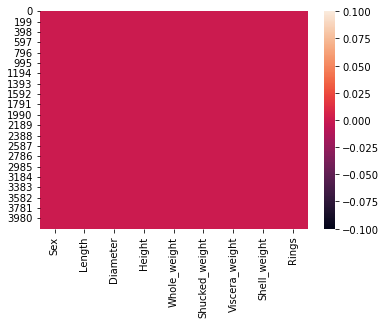

In [11]:
sns.heatmap(data=df1.isnull())

<AxesSubplot:xlabel='Length', ylabel='Density'>

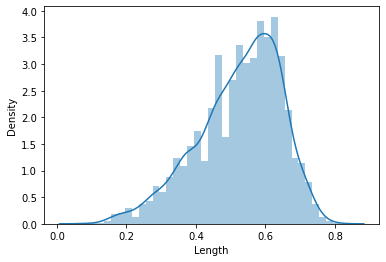

In [12]:
# distribution:

sns.distplot(df1["Length"])

<AxesSubplot:xlabel='Height', ylabel='Density'>

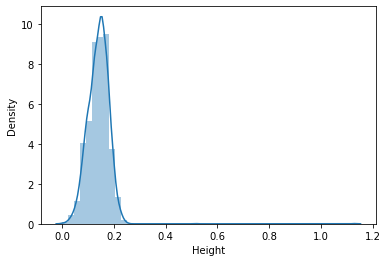

In [13]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Whole_weight', ylabel='Density'>

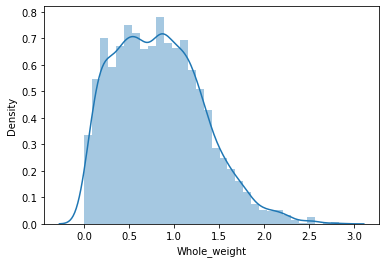

In [14]:
sns.distplot(df['Whole_weight'])

<AxesSubplot:xlabel='Shell_weight', ylabel='Density'>

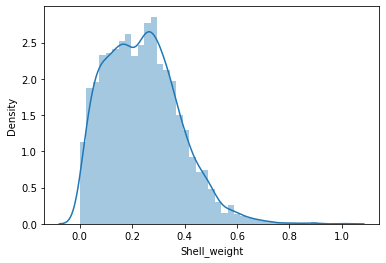

In [15]:
sns.distplot(df['Shell_weight'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

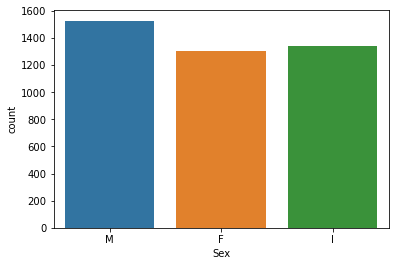

In [16]:
sns.countplot(df1['Sex'])

In [17]:
df1.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [18]:
df.iloc[:,0]

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

# Level Encoder is used

In [19]:
lencode=LabelEncoder()
df1['Gender']=lencode.fit_transform(df1['Sex'])
#to replace df1['Sex']=lencode.fit_transform(df1['Sex'])

In [20]:
df1.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Gender
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [21]:
del df1['Sex']

In [22]:
df1.head(5)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Gender
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [23]:
p=df1.pop('Rings')

In [24]:
p

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [25]:
df1.head(1)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Gender
0,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,2


In [26]:
df1['Rings']=pd.DataFrame(data=p)

In [27]:
df1.head(5)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Gender,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,2,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1,7


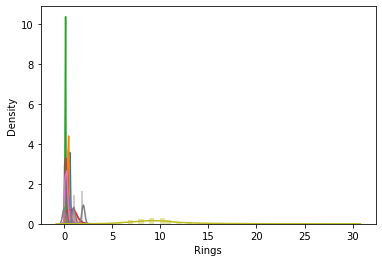

In [28]:
for i in df1.columns:
    sns.distplot(df1[i])

<AxesSubplot:xlabel='Height', ylabel='Density'>

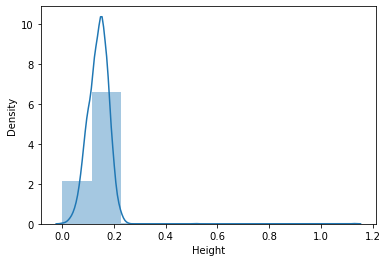

In [29]:
sns.distplot(df1['Height'],bins=10)

<AxesSubplot:xlabel='Height', ylabel='Count'>

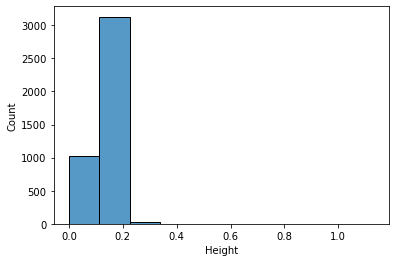

In [30]:
sns.histplot(df['Height'],bins=10)

<AxesSubplot:xlabel='Rings', ylabel='Count'>

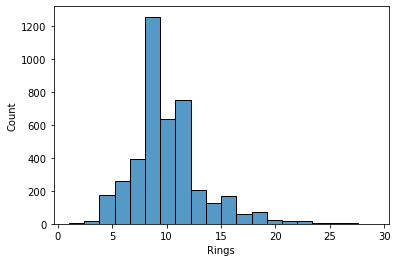

In [31]:
sns.histplot(df1['Rings'],bins=20)

sns.kdeplot?

<AxesSubplot:xlabel='Whole_weight', ylabel='Density'>

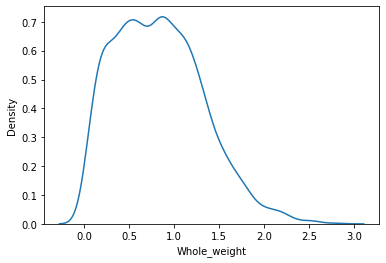

In [32]:
sns.kdeplot(df1['Whole_weight'])

In [34]:
sns.regplot? # x, y variable is required

SyntaxError: invalid syntax (1128967334.py, line 1)

<AxesSubplot:xlabel='Shell_weight', ylabel='Height'>

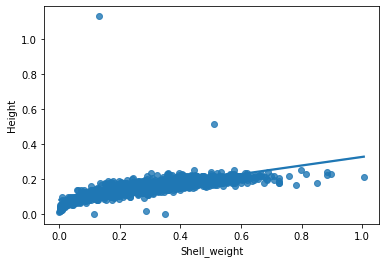

In [43]:
sns.regplot(x="Shell_weight",y="Height",data=df)

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

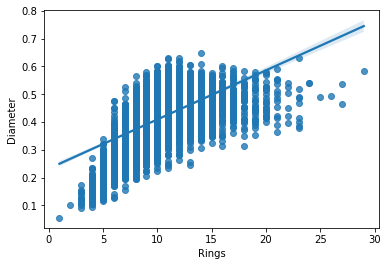

In [45]:
sns.regplot(y='Diameter',x='Rings',data=df1) # rings increasing with increase in diameter

In [46]:
df1

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Gender,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,10


<AxesSubplot:xlabel='Diameter', ylabel='Whole_weight'>

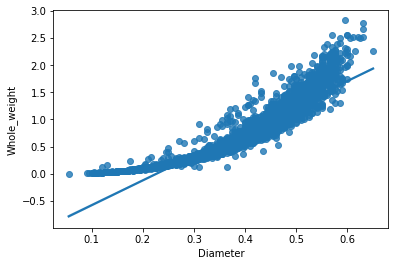

In [47]:
sns.regplot(y='Whole_weight',x='Diameter',data=df1)

<AxesSubplot:xlabel='Diameter', ylabel='Whole_weight'>

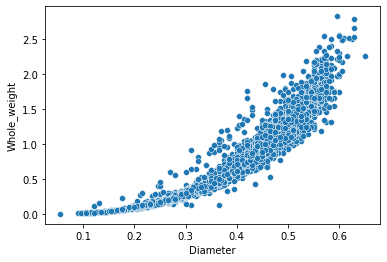

In [50]:
sns.scatterplot(y='Whole_weight', x='Diameter',data=df1)

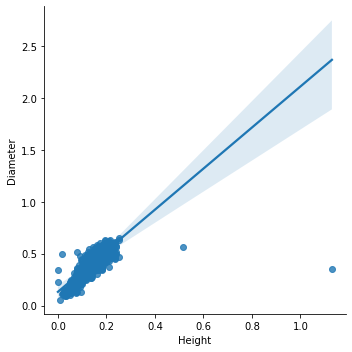

In [51]:
sns.lmplot(x='Height',y='Diameter',data=df1)

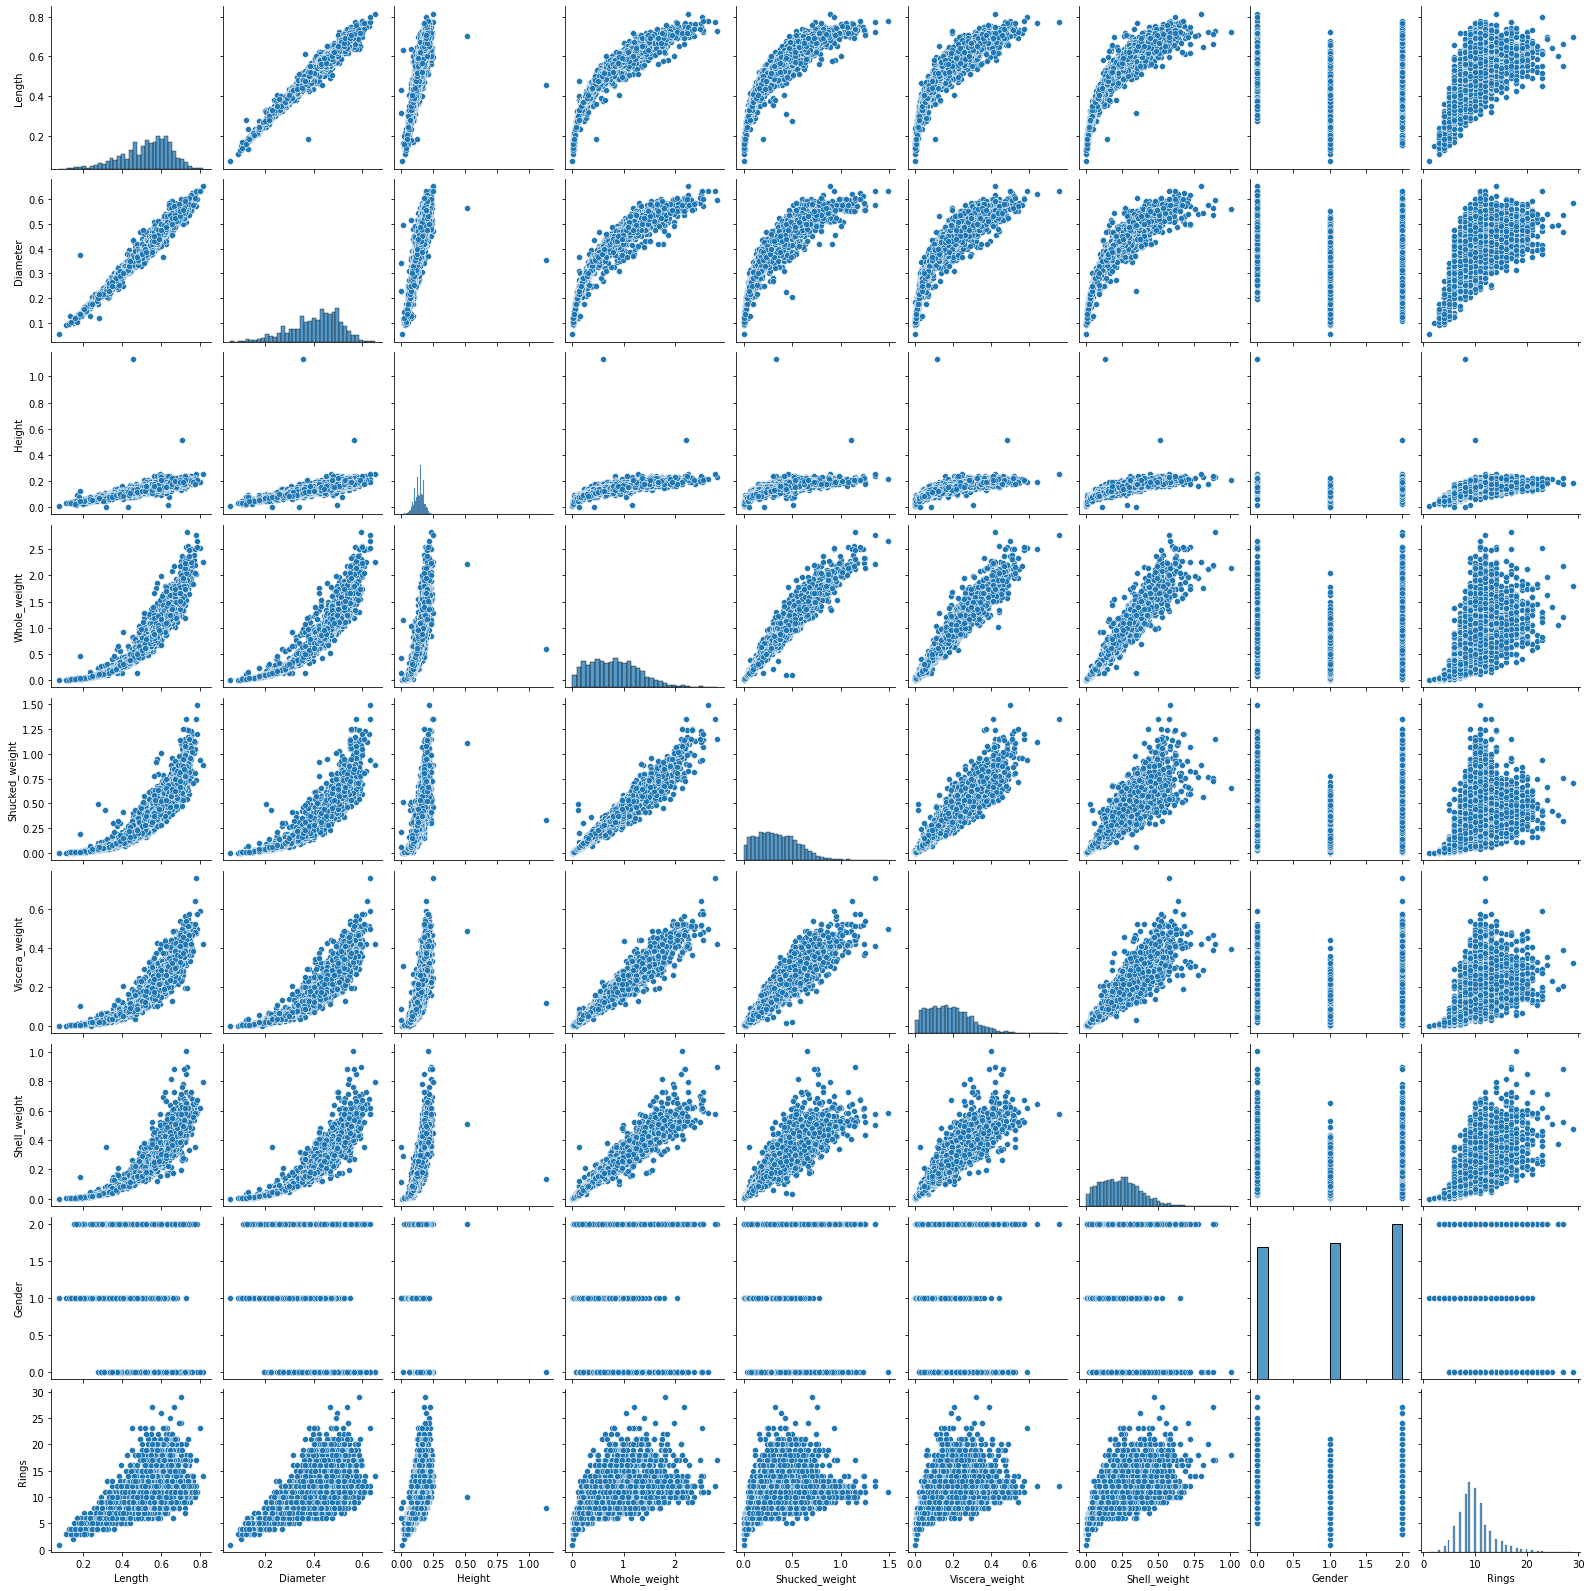

In [52]:
sns.pairplot(df1)

In [53]:
df1.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Gender,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,1.052909,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,0.822240,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,0.000000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,1.000000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,2.000000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,2.000000,29.000000


Observation:
    
    High gap between 75th percentile and max is present in rings.So few Outliers is present.


In [55]:
df1.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole_weight      0.530959
Shucked_weight    0.719098
Viscera_weight    0.591852
Shell_weight      0.620927
Gender           -0.098155
Rings             1.114102
dtype: float64

# "Remove skweness"

In [58]:
"Scewness can removed from Height by following methords"

#df1['Height']=np.lod(df['Height']) # height skewness can be removed 

df1['Height']=np.sqrt(df1['Height']) # height sknewness np.sqroot tranformation if one is not working
df1.skew()

Length           -0.639873
Diameter         -0.609198
Height           -1.604618
Whole_weight      0.530959
Shucked_weight    0.719098
Viscera_weight    0.591852
Shell_weight      0.620927
Gender           -0.098155
Rings             1.114102
dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Count'>

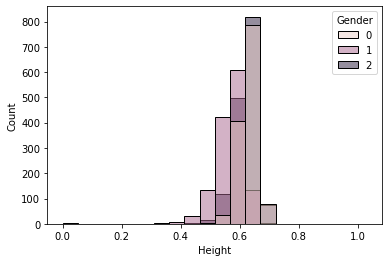

In [62]:
sns.histplot(x='Height',hue='Gender', bins=20, data=df1)

<AxesSubplot:xlabel='Height', ylabel='Count'>

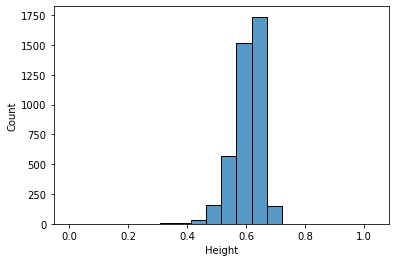

In [64]:
sns.histplot(df1['Height'],bins=20)

# Detecting Outliers

In [65]:
from scipy.stats import zscore  # calling lib

df1_zscore=np.abs(zscore(df1))

print(np.where(df1_zscore>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  174,  181,  232,  236,  236,  236,  237,
        237,  237,  238,  238,  238,  239,  239,  270,  275,  277,  278,
        294,  306,  310,  313,  314,  321,  333,  334,  351,  355,  358,
        358,  362,  375,  416,  417,  428,  431,  433,  469,  478,  480,
        501,  525,  526,  526,  526,  530,  572,  628,  673,  674,  675,
        678,  694,  694,  696,  696,  718,  719,  719,  719,  720,  720,
        720,  744,  754,  756,  811,  891,  891,  891, 1048, 1051, 1051,
       1052, 1055, 1056, 1174, 1193, 1197, 1199, 1202, 1204, 1206, 1206,
       1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418, 1422,
       1426, 1427, 1427, 1427, 1428, 1429, 1429, 1429, 1528, 1754, 1756,
       1757, 1759, 1761, 1762, 1762, 1762, 1763, 1763, 1763, 1821, 1824,
       1982, 1986, 1986, 1987, 1987, 1987, 2051, 2090, 2108, 2108, 2114,
       2114, 2114, 2157, 2161, 2169, 2171, 2172, 2

In [66]:
# drop z-score value is more the 3

df1_new=df1[(df1_zscore<3).all(axis=1)]
print('dfnew.shape = ',df1_new.shape)

dfnew.shape =  (4008, 9)


In [67]:
df1=df1_new

In [68]:
df1.corr() # checking co-relation

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Gender,Rings
Length,1.000000,0.985510,0.907643,0.935982,0.910543,0.909218,0.915364,-0.042189,0.557752
Diameter,0.985510,1.000000,0.912772,0.935325,0.905178,0.905070,0.922527,-0.045213,0.576231
Height,0.907643,0.912772,1.000000,0.874929,0.828333,0.852732,0.881831,-0.045337,0.612559
Whole_weight,0.935982,0.935325,0.874929,1.000000,0.970666,0.966228,0.960716,-0.033691,0.541971
Shucked_weight,0.910543,0.905178,0.828333,0.970666,1.000000,0.929327,0.894918,-0.015267,0.432817
Viscera_weight,0.909218,0.905070,0.852732,0.966228,0.929327,1.000000,0.918475,-0.044145,0.516581
Shell_weight,0.915364,0.922527,0.881831,0.960716,0.894918,0.918475,1.000000,-0.042897,0.617436
Gender,-0.042189,-0.045213,-0.045337,-0.033691,-0.015267,-0.044145,-0.042897,1.000000,-0.032452
Rings,0.557752,0.576231,0.612559,0.541971,0.432817,0.516581,0.617436,-0.032452,1.000000


<AxesSubplot:>

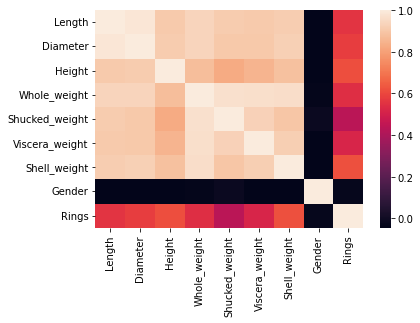

In [69]:
sns.heatmap(df1.corr())

<AxesSubplot:>

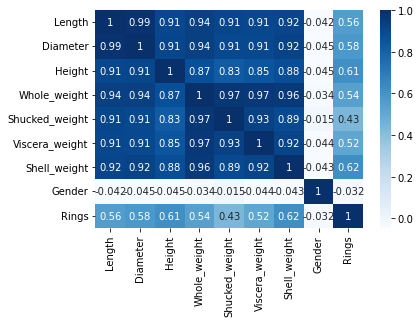

In [71]:
sns.heatmap(df1.corr(),cmap="Blues",annot=True)

# Checking if their is any Multi-Colinearity

### variance_inflation_factor

In [80]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
x=df1.iloc[:,0:-1]

In [76]:
y=df1.iloc[:,-1]

In [74]:
x.shape

(4008, 8)

In [77]:
y.shape

(4008,)

In [78]:
x.head(5)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Gender
0,0.455,0.365,0.555176,0.5140,0.2245,0.1010,0.150,2
1,0.350,0.265,0.547723,0.2255,0.0995,0.0485,0.070,2
2,0.530,0.420,0.606155,0.6770,0.2565,0.1415,0.210,0
3,0.440,0.365,0.594604,0.5160,0.2155,0.1140,0.155,2
4,0.330,0.255,0.531830,0.2050,0.0895,0.0395,0.055,1


In [79]:
y.head(5)

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [81]:
# length with diameter.... and whole_weight, shucked_weight may be multicolinear..lets check

def vif_calc():
    vif=pd.DataFrame() # would form a Data Frame
    # making a new column as vif factor
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    #getting column name
    vif['features']=x.columns
    print(vif) # move the data to 2D dataframe
    
    

In [82]:
vif_calc()

   VIF Factor        features
0  840.121564          Length
1  754.775567        Diameter
2  128.602723          Height
3  442.383827    Whole_weight
4  110.533708  Shucked_weight
5   65.796002  Viscera_weight
6   94.333529    Shell_weight
7    2.661349          Gender


# Data Cleansing

Feature engneering----- 

Selction of Feature /variable/columns

Dectect Outliers/Remove

In [83]:
df1.drop(['Length','Shucked_weight'],axis=1,inplace=True)

In [84]:
df1

,Diameter,Height,Whole_weight,Viscera_weight,Shell_weight,Gender,Rings
0,0.365,0.555176,0.5140,0.1010,0.1500,2,15
1,0.265,0.547723,0.2255,0.0485,0.0700,2,7
2,0.420,0.606155,0.6770,0.1415,0.2100,0,9
3,0.365,0.594604,0.5160,0.1140,0.1550,2,10
4,0.255,0.531830,0.2050,0.0395,0.0550,1,7
...,...,...,...,...,...,...,...
4172,0.450,0.637340,0.8870,0.2390,0.2490,0,11
4173,0.440,0.606155,0.9660,0.2145,0.2605,2,10
4174,0.475,0.672881,1.1760,0.2875,0.3080,2,9
4175,0.485,0.622333,1.0945,0.2610,0.2960,0,10


In [85]:
x=df1.iloc[:,0:-1]

In [86]:
y=df1.iloc[:,-1]

In [88]:
# again claculating vif(variance_inflation_factor)

def vif1_cal():
    vif=pd.DataFrame()
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['feature']=x.columns
    return(vif)

In [90]:
vif1_cal()

,VIF FACTOR,feature
0,210.843902,Diameter
1,104.158382,Height
2,142.534610,Whole_weight
3,60.674431,Viscera_weight
4,59.575559,Shell_weight
5,2.652638,Gender


<AxesSubplot:>

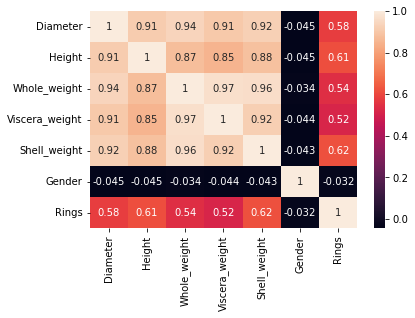

In [91]:
sns.heatmap(df1.corr(),annot=True)

# Standard Scaler

In [92]:
df1

,Diameter,Height,Whole_weight,Viscera_weight,Shell_weight,Gender,Rings
0,0.365,0.555176,0.5140,0.1010,0.1500,2,15
1,0.265,0.547723,0.2255,0.0485,0.0700,2,7
2,0.420,0.606155,0.6770,0.1415,0.2100,0,9
3,0.365,0.594604,0.5160,0.1140,0.1550,2,10
4,0.255,0.531830,0.2050,0.0395,0.0550,1,7
...,...,...,...,...,...,...,...
4172,0.450,0.637340,0.8870,0.2390,0.2490,0,11
4173,0.440,0.606155,0.9660,0.2145,0.2605,2,10
4174,0.475,0.672881,1.1760,0.2875,0.3080,2,9
4175,0.485,0.622333,1.0945,0.2610,0.2960,0,10


#here data is not in proper scale, as we see Diameter 0.000,height 0.0000,genderis int

Hence scalling is done to control the values. and fut them in one scale

scaling is of two type:
    
    1. Standared------>mean is 0, STD devision is +,- =1
    
    2. MinMax scaler-->within Decimal as the values will become 0 and heigher value will be 1

In [93]:
scale=StandardScaler()

x=scale.fit_transform(x)
x

array([[-0.43930707, -1.1741504 , -0.64318589, -0.73283145, -0.64112972,
         1.15809659],
       [-1.49846417, -1.34753553, -1.27829308, -1.24282071, -1.26926824,
         1.15809659],
       [ 0.14322933,  0.01168572, -0.28435584, -0.33941116, -0.17002584,
        -1.28295055],
       ...,
       [ 0.72576573,  1.56385142,  0.81414845,  1.0788447 ,  0.59944385,
         1.15809659],
       [ 0.83168144,  0.38801871,  0.63473342,  0.82142154,  0.50522307,
        -1.28295055],
       [ 1.5730914 ,  1.3693756 ,  2.51473875,  1.94339792,  2.06771762,
         1.15809659]])

In [95]:
x.shape

(4008, 6)

# Now Train Test split 

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [109]:
x_train.shape

(3206, 6)

In [110]:
y_train.shape

(3206,)

In [111]:
x_test.shape

(802, 6)

In [112]:
y_test.shape

(802,)

In [113]:
lr=LinearRegression()

In [114]:
lr.fit(x_train,y_train)

LinearRegression()

In [115]:
lr.score(x_test,y_test)

0.43940212237502985

In [116]:
lr.coef_

array([ 0.13966199,  1.15956535, -2.65916403,  0.06854864,  3.07727406,
        0.02820185])

In [117]:
#pd.DataFrame?

In [120]:
features=['Diameter','Height','Whole_weight','Viscera_weight','Shell_weight','Gender']
list(zip(lr.coef_,features))

[(0.1396619860775715, 'Diameter'),
 (1.1595653504770531, 'Height'),
 (-2.6591640251242654, 'Whole_weight'),
 (0.06854863716234066, 'Viscera_weight'),
 (3.077274059203334, 'Shell_weight'),
 (0.02820184817065931, 'Gender')]

In [121]:
cfdf=pd.DataFrame(data=lr.coef_,index=features)

In [122]:
cfdf

,0
Diameter,0.139662
Height,1.159565
Whole_weight,-2.659164
Viscera_weight,0.068549
Shell_weight,3.077274
Gender,0.028202


In [124]:
lr.intercept_

9.745140692995076

In [125]:
lr.score(x_train,y_train)

0.4533080993845112

In [129]:
predi=lr.predict(x_test)

predi

In [133]:
print(mean_absolute_error(predi,y_test),"\n")

print(mean_squared_error(predi,y_test),"\n")


1.605128301103686 

4.854591417828998 



In [137]:
print("Root mean Square",np.sqrt(mean_squared_error(predi,y_test)))

Root mean Square 2.2033137356783756


In [138]:
print('R2 score::',r2_score(y_test,pred))

R2 score:: 0.43940212237502985


In [139]:
t=np.array([0.450,0.637340,0.8870,0.2390,0.2490,0])

In [140]:
t.shape

(6,)

In [145]:
def predict(t):
    t=t.reshape(1,-1)
    pred=lr.predict(t)
    return(pred)

In [146]:
predict(t)

array([8.97097184])

# Regularization

Checking if data is highly bais(under fit), or high variance(over fit)

In [147]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

from sklearn.metrics import r2_score

In [148]:
rdg=Ridge(alpha=0.001,random_state=45)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.45330809937707606

In [149]:
rdg.coef_

array([ 0.13965952,  1.15956659, -2.65912196,  0.0685325 ,  3.07724868,
        0.02820135])

In [150]:
cfdf=pd.DataFrame(data=rdg.coef_,index=features)

In [151]:
cfdf

,0
Diameter,0.139660
Height,1.159567
Whole_weight,-2.659122
Viscera_weight,0.068533
Shell_weight,3.077249
Gender,0.028201


In [153]:
predict=rdg.predict(x_test)

In [154]:
r2_score(y_test,predict)

0.439402551007393

In [155]:
lso=Lasso(alpha=.0001,random_state=47)
lso.fit(x_train,y_train)
lso.score(x_train,y_train)

0.45330791632716827

In [156]:
predict1=lso.predict(x_train)

In [157]:
predict1

array([10.71706861, 11.8714745 , 11.81217679, ...,  7.82296279,
       10.45424163,  7.68209129])

#r2_score(predict1,y_test)

In [162]:
# Approaching more regressors

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR